# Pytorch II - MINDST Dataset with PyTorch

In [4]:
import torch
import torchvision
from torchvision import transforms
image_path = 'data/'
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_train = torchvision.datasets.MNIST(root=image_path, train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.MNIST(root=image_path, train=False, download=True, transform=transform)

train_dl = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_dl = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [5]:
from torch.nn import Sequential

class TwoLayerNet(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.model = Sequential(
            torch.nn.Flatten(start_dim=1, end_dim=-1), # 1, 28, 28 -> 1, 784
            torch.nn.Linear(784, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 10),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.model(x)

In [6]:
num_epochs = 10

model = TwoLayerNet()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

losses = [0] * num_epochs
accuracies_train = [0] * num_epochs
accuracies_test = [0] * num_epochs

for epoch in range(num_epochs):

    total = 0
    correct = 0
    for i, (images, labels) in enumerate(train_dl):

        images = images.view(-1, 784)

        outputs = model(images)
        loss = loss_fn(outputs, labels)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        losses[epoch] += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    losses[epoch] /= len(train_dl)
    accuracies_train[epoch] = correct / total
    
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_dl:
            images = images.view(-1, 784)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracies_test[epoch] = correct / total
    if epoch % 1 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {losses[epoch]:.4f}, Train Acc: {accuracies_train[epoch]:.4f}, Test Acc: {accuracies_test[epoch]:.4f}')

Epoch 1/10, Loss: 1.7307, Train Acc: 0.7707, Test Acc: 0.9052
Epoch 2/10, Loss: 1.5649, Train Acc: 0.9069, Test Acc: 0.9159
Epoch 3/10, Loss: 1.5496, Train Acc: 0.9191, Test Acc: 0.9183
Epoch 4/10, Loss: 1.5409, Train Acc: 0.9263, Test Acc: 0.9232
Epoch 5/10, Loss: 1.5347, Train Acc: 0.9315, Test Acc: 0.9303
Epoch 6/10, Loss: 1.5295, Train Acc: 0.9363, Test Acc: 0.9348
Epoch 7/10, Loss: 1.5256, Train Acc: 0.9393, Test Acc: 0.9359
Epoch 8/10, Loss: 1.5217, Train Acc: 0.9426, Test Acc: 0.9393
Epoch 9/10, Loss: 1.5185, Train Acc: 0.9463, Test Acc: 0.9408
Epoch 10/10, Loss: 1.5164, Train Acc: 0.9477, Test Acc: 0.9433


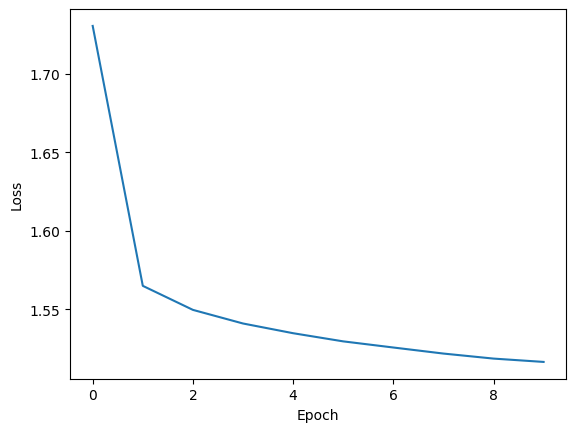

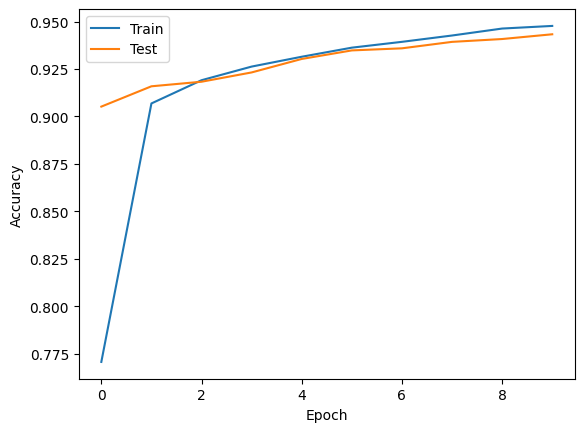

In [7]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(accuracies_train, label='Train')
plt.plot(accuracies_test, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Label: 8, Predicted: 8


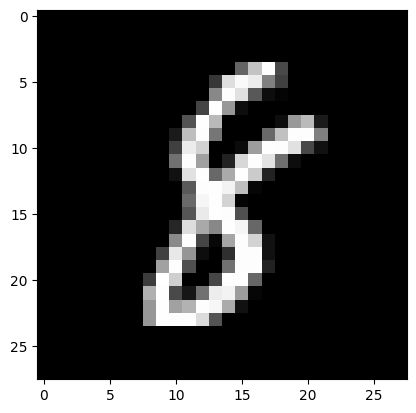

Label: 9, Predicted: 9


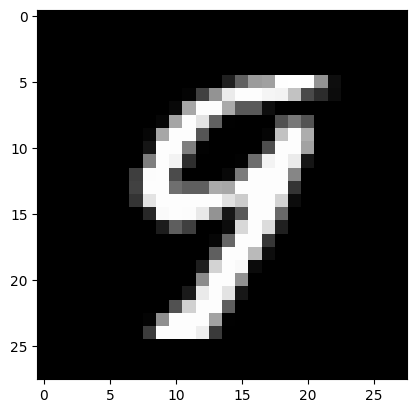

Label: 0, Predicted: 0


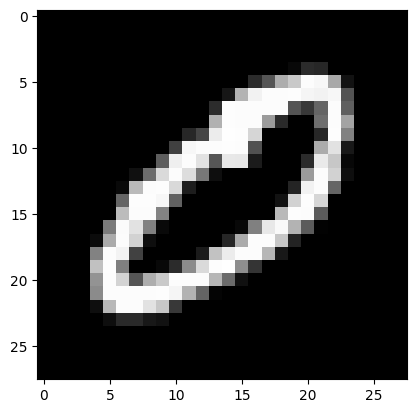

Label: 1, Predicted: 1


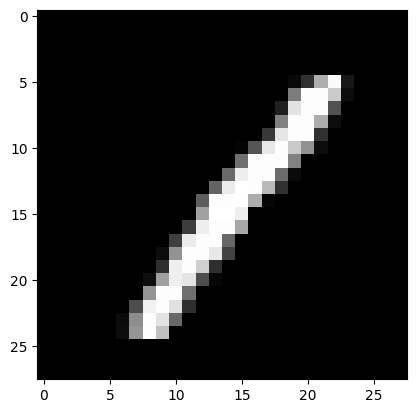

Label: 2, Predicted: 2


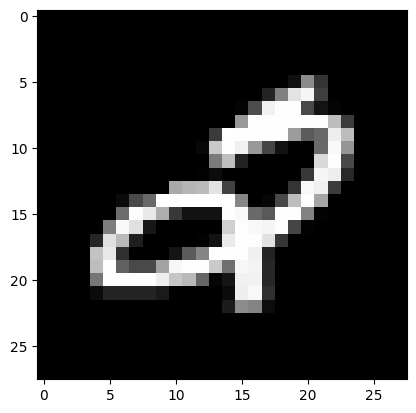

Label: 3, Predicted: 7


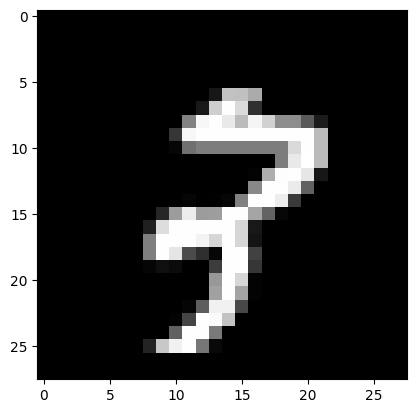

Label: 4, Predicted: 4


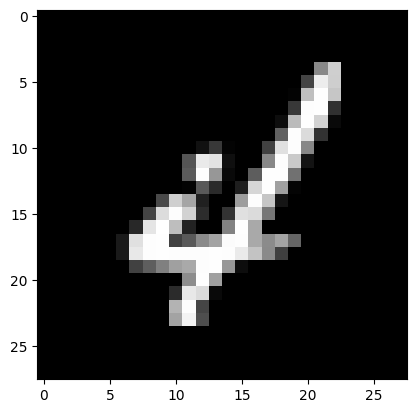

Label: 5, Predicted: 5


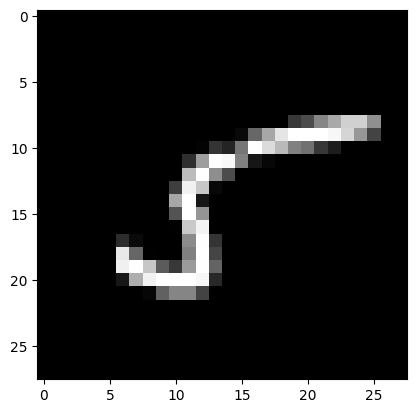

Label: 6, Predicted: 6


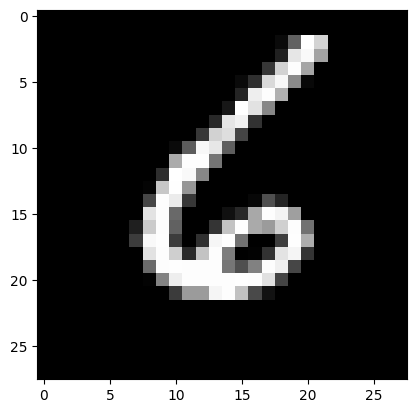

Label: 7, Predicted: 7


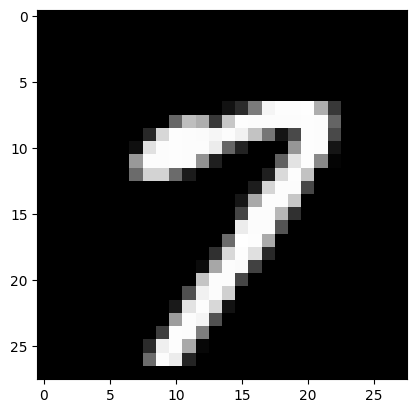

In [8]:
for i in range(10):
    print(f'Label: {labels[i]}, Predicted: {predicted[i]}')
    plt.imshow(images[i].view(28, 28).numpy(), cmap='gray')
    plt.show()